# **IMAGE CLASSIFICATION – FASHION MNIST**

### *Mini Project 1*


*Name: Gaurika Chopra*  
*Date: 29.10.2025*

Cloning the Fashion-MNIST Repository

In this step, I am cloning a GitHub repository named **`fashion-mnist`**.

Cloning means downloading all the files and version history from a remote Git repository to the local computer.  
The command below creates a new folder called **`fashion-mnist`** and copies the entire project into it.


In [1]:
# !git clone https://github.com/zalandoresearch/fashion-mnist.git

The dataset files in the `fashion-mnist` repository are stored in compressed `.gz` format.  
Before using them, I extract them.

The command below `gzip` to decompress all `.gz` files in the `fashion-mnist/data/fashion/` folder.

In [2]:
#!gzip -d fashion-mnist/data/fashion/*.gz

Importing Required Libraries

In this step, I import all the essential Python libraries needed for working with the **Fashion-MNIST dataset**.

In [3]:
## Importing libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Importing libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import the necessary libraries for CNN
import numpy as np
import struct
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision

Loading the Fashion-MNIST Dataset from Raw Files

The following two functions are used to **read and process** the raw Fashion-MNIST data files, which are stored in binary `.idx` format.


In [4]:
def load_mnist_images(filename):
    # Open the image file in binary read mode
    with open(filename, 'rb') as f:
        # Read the first 16 bytes which contain header information
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        # Read the rest of the file as unsigned 8-bit integers (pixel values 0–255)
        data = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape the flat array into a 4D array
        data = data.reshape(num, 1, rows, cols)
        return data / 255.0  # normalize to [0,1] for NN input

def load_mnist_labels(filename):
    # Open the label file in binary read mode
    with open(filename, 'rb') as f:
        # Read the first 8 bytes which contain header information
        magic, num = struct.unpack(">II", f.read(8))
        # Read the remaining bytes as unsigned 8-bit integers (label values 0–9)
        data = np.frombuffer(f.read(), dtype=np.uint8)
        # Return the 1D array of labels
        return data

Loading the Training and Test Datasets

Using helper functions to read the Fashion-MNIST files, I use them to load both the **training** and **test** datasets.

In [5]:
train_images = load_mnist_images('fashion-mnist/data/fashion/train-images-idx3-ubyte')
train_labels = load_mnist_labels('fashion-mnist/data/fashion/train-labels-idx1-ubyte')
test_images  = load_mnist_images('fashion-mnist/data/fashion/t10k-images-idx3-ubyte')
test_labels  = load_mnist_labels('fashion-mnist/data/fashion/t10k-labels-idx1-ubyte')

In [6]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 1, 28, 28) (60000,)
(10000, 1, 28, 28) (10000,)


In [7]:
#Defining the classes used by all techniques
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Applying Classical ML techniques

##### LOGISTIC REGRESSION

The Basic Idea

I am using **Logistic Regression**, which is a classic linear model. It works by learning how much "weight" or importance to give to each pixel in an image. Based on those weights, it calculates the probability that the image belongs to each of the 10 different clothing classes mentioned above.

What the code is performing?

1. Getting the Data Ready
First, I flatten each image into one long line of 784-pixel values. I am also standardizing the data (setting its mean to 0 and standard deviation to 1). This helps the model train faster and more reliably.

2. Training the Model
I am using the standard `LogisticRegression` from the `scikit-learn` library. Since I have 10 classes and not a basic binary solution problem, I am setting it to multinomial mode/ Softmax. This tells the model to learn 10 different sets of weights, one for each clothing category.

3. Checking the Work
Once it's trained, I check for how well it did on the test data. I look at the overall accuracy, and also dig deeper with a full classification report and a confusion matrix heatmap. The matrix helps in seeing exactly which classes the model got mixed up. I plot a bar chart to see the accuracy for each class simultaneously.

In [8]:
# Flatten the images into vectors (28x28 >> 784)
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
y_train = train_labels
y_test = test_labels

# Scale features for faster convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
print("Training Logistic Regression...")
log_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', n_jobs=-1)
log_model.fit(X_train_scaled, y_train)

# Evaluate the model
log_preds = log_model.predict(X_test_scaled)
log_acc = accuracy_score(y_test, log_preds)
print(f"\nLogistic Regression Test Accuracy: {log_acc * 100:.2f}%")

Training Logistic Regression...


/Users/gaurika/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Test Accuracy: 83.48%



Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.80      0.80      1000
     Trouser       0.96      0.96      0.96      1000
    Pullover       0.72      0.72      0.72      1000
       Dress       0.82      0.85      0.83      1000
        Coat       0.73      0.75      0.74      1000
      Sandal       0.93      0.92      0.93      1000
       Shirt       0.61      0.56      0.58      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.91      0.92      0.92      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



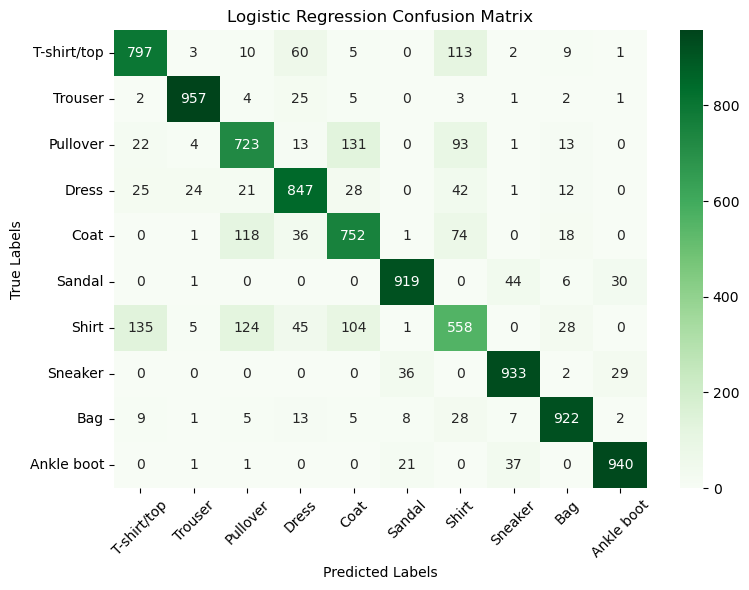

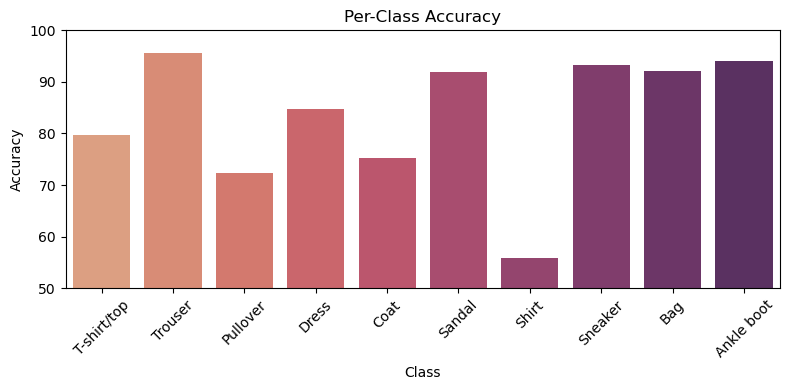

In [9]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, log_preds, target_names=classes))

# Confusion Matrix Visualization
log_cm = confusion_matrix(y_test, log_preds)
plt.figure(figsize=(8,6))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=classes, yticklabels=classes)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class Accuracy Plot
per_class_acc = log_cm.diagonal() / log_cm.sum(axis=1)
acc_df = pd.DataFrame({'Class': classes, 'Accuracy': per_class_acc * 100})

plt.figure(figsize=(8,4))
sns.barplot(data=acc_df, x='Class', y='Accuracy', palette='flare')
plt.title('Per-Class Accuracy')
plt.xticks(rotation=45)
plt.ylim(50, 100)
plt.tight_layout()
plt.show()

#### Results for Logistic Regression: 

The **accuracy** was **83.48%**. The predictions for Trouser, Sneaker and Ankle boot were fairly accurate. 

* The model can distinctively differentiate between footwear and clothes, for example Ankle boot and top, Ankle boot and Dress, Sandal and Dress. 
* The model fails to tell the difference between similar looking items, such as, Coat and Pullover, Shirt and Tshirt, which leads to misclassification. 

For such a simple linear model, Logistic Regression does a good job!

Because it's linear, it treats every pixel independently. It has no concept of shape or which pixels are next to each other. It can't see the arm of a cloth or a neckline. The patterns that define a shirt vs a pullover are complex and non-linear. My logistic model can't understand that a specific group of pixels forms a sleeve or a neckline. That's why I am turning to a Random Forest next. As an ensemble of decision trees, it introduces nonlinearity. It can learn the intricate patterns in the pixel data that the linear model simply missed, which I hope will significantly improve my model's performance.

##### RANDOM FOREST CLASSIFICATION

Code Explanation

I am using a **Random Forest Classifier** to improve upon the performance of the simple Logistic Regression model.

* Data Preparation: I start by **flattening** the 28x28 pixel images into a 784-feature vector. This is necessary because the Random Forest model, like Logistic Regression, expects a 1-D feature array, not a 2D image grid.
* Model Training: I initialize the `RandomForestClassifier` with `n_estimators=100`. The model builds 100 independent decision trees. It is an ensemble learning technique where the final prediction is determined by a majority vote among individual trees.


In [10]:
# Flatten the 28x28 images into 784 features for the Random Foirest
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
y_train = train_labels
y_test = test_labels

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Training a Random Forest Classifier
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Evaluating on test data
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"\n Random Forest Test Accuracy: {rf_acc * 100:.2f}%")

Training data shape: (60000, 784)
Test data shape: (10000, 784)

Training Random Forest...

 Random Forest Test Accuracy: 87.48%



Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.76      0.81      0.78      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.77      0.81      0.79      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.72      0.58      0.64      1000
     Sneaker       0.92      0.95      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



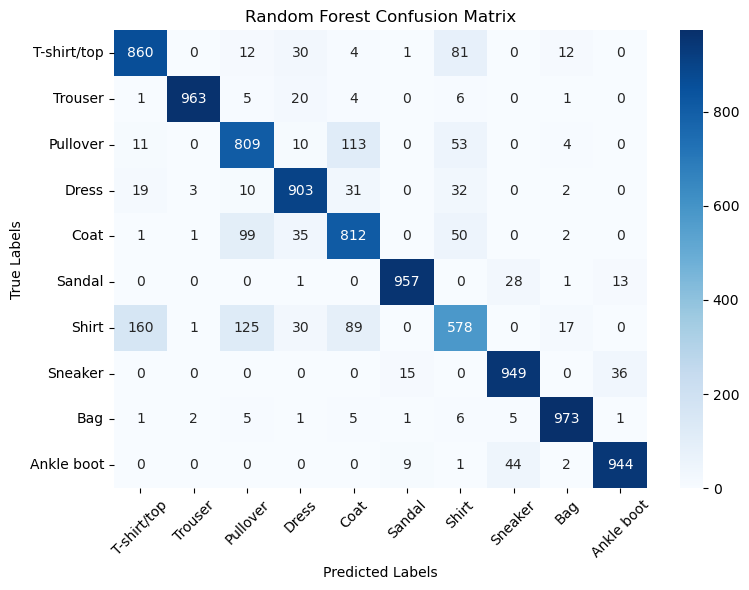

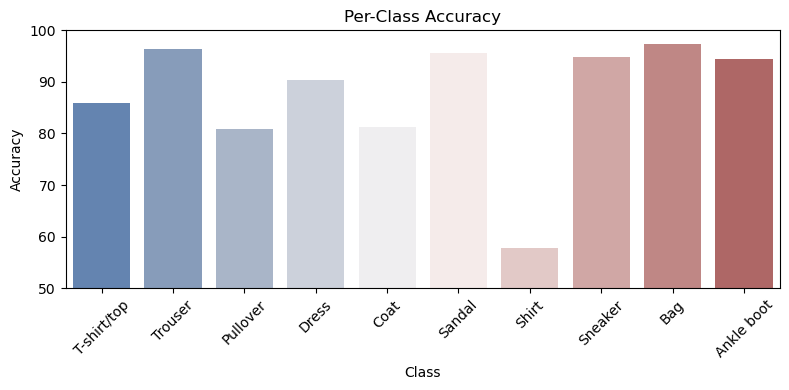

In [11]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_preds, target_names=classes))

# Confusion Matrix Visualization
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class Accuracy Bar Plot
per_class_acc = rf_cm.diagonal() / rf_cm.sum(axis=1)
acc_df = pd.DataFrame({'Class': classes, 'Accuracy': per_class_acc * 100})

plt.figure(figsize=(8,4))
sns.barplot(data=acc_df, x='Class', y='Accuracy', palette='vlag')
plt.title('Per-Class Accuracy')
plt.xticks(rotation=45)
plt.ylim(50, 100)
plt.tight_layout()
plt.show()

Results for **Random Forest:**

The Random Forest model achieved a **Test Accuracy of 87.48%**. This is a significant improvement over the Logistic Regression model ($83.48$) and confirms that the non-linear nature of decision trees is better suited to this complex image MNIST data.

The improved accuracy shows the Random Forest captures pixel features that the Logistic Regression model missed.
* The model performs exceptionally well to predict Trousers, Sneakers, Bag and Ankle Boots, achieving very high accuracy ($\approx 95\%$).
* The model continues to struggle most with visually similar classes, particularly Shirt & Tshirt/Top, Shirt and Pullover, Coat and Pullover (as seen on Confusion Matrix). 


Despite the strong performance, the Random Forest loses the spatial structure. Both the Logistic Regression (linear) and the Random Forest (non-linear) models treated my images as a flat, disconnected array of 784 pixels. They were both forced to ignore the fundamental spatial structure of the data, that a pixel's value is highly dependent on the pixels surrounding it.

The performance plateaued because it cannot understand concepts like edges, corners, or textures.
I am now moving to **Convolutional Neural Networks (CNNs)**. This type of model is specifically designed for image data. 

### Applying NN techniques

Creating PyTorch Datasets and Data Loaders

Now that the Fashion-MNIST images and labels are loaded as NumPy arrays, I convert them into PyTorch tensors and wrap them in `TensorDataset` and `DataLoader` objects.  
It makes it easy to feed data into the NN for training and testing.


In [12]:
train_dataset = TensorDataset(
    torch.tensor(train_images, dtype=torch.float32),
    torch.tensor(train_labels, dtype=torch.long)
)

test_dataset = TensorDataset(
    torch.tensor(test_images, dtype=torch.float32),
    torch.tensor(test_labels, dtype=torch.long)
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

Training images


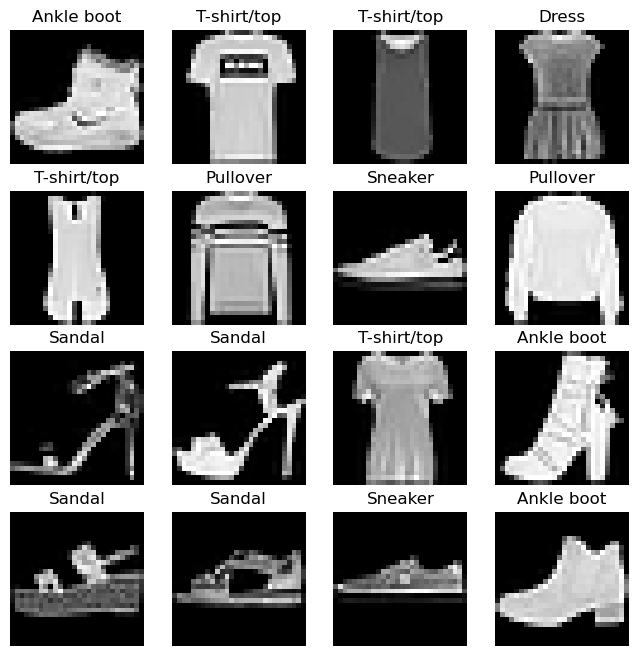

Testing images


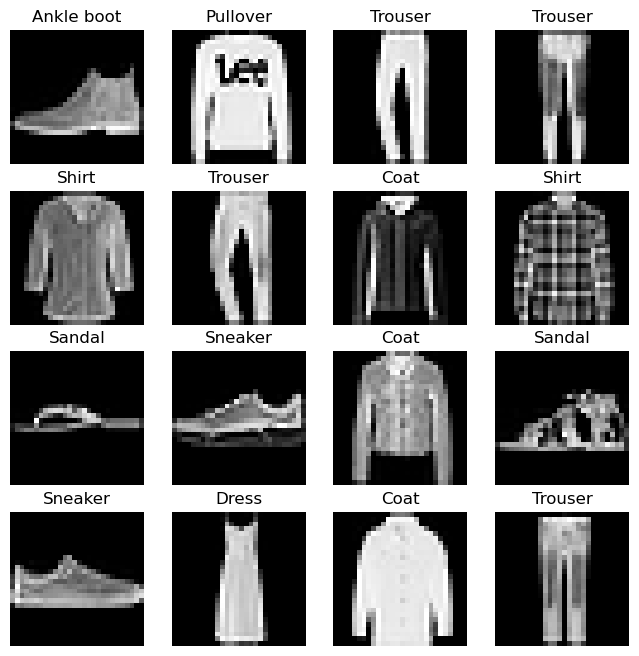

In [13]:
def show_images(images, labels, classes, n=16):
    plt.figure(figsize=(8,8))
    for i in range(n):
        plt.subplot(4,4,i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.show()

# training images
print("Training images")
show_images(train_images, train_labels, classes, n=16)

# test images
print("Testing images")
show_images(test_images, test_labels, classes, n=16)

The `FashionCNN` class below defines a **CNN** I built with PyTorch for classifying images in the **Fashion-MNIST dataset**.  
Fashion-MNIST has 28×28 grayscale images of clothing items with a goal  to predict which of the 10 categories each image belongs to.

The network has 2 parts:

`conv_layers`, automatically learns to extract features from the raw pixel data.

- It starts with 2 blocks, each made up of:
  - `Conv2d` layers: To learn spatial patterns like edges, textures, and shapes.
  - `BatchNorm2d` layers: To normalize activations to stabilize and speed up training.
  - `ReLU` activations: To add non-linearity so the model can learn complex relationships.
  - `MaxPool2d` layers: To help the model focus on the most important features

Each image is transformed into **64 feature maps of size 7×7**, representing learned visual features.

`fc_layers`, takes the extracted features to further perform classification.

- The `Flatten` layer converts 3D feature maps to a 1D vector.
- fully connected (`Linear`) layer reduces this to 128 neurons.
- `ReLU` activation adds non-linearity.
- `Dropout` layer randomly disables 30% (0.3) of neurons during training to prevent overfitting.
- `Linear` layer outputs **10 values**, each representing one clothing class.

In [14]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [15]:
model = FashionCNN() #Initializing the CNN Model

In [16]:
criterion = nn.CrossEntropyLoss() #Loss function for training
optimizer = optim.Adam(model.parameters(), lr=0.001) #optimizer to update model weights

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Device setup, Checks if GPU (CUDA) is available otherwise uses the CPU
model.to(device)

num_epochs = 10 # No of times model iterates over the entire training dataset
train_losses = []
train_accuracies = []
# Stores loss and accuracy after each epoch for monitoring training progress

for epoch in range(num_epochs): #Looping through all epochs
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad() # Clears gradients from previous step
        outputs = model(images) #Forward pass through CNN to get predicted logits
        loss = criterion(outputs, labels) #Computes loss between predictions and true labels
        loss.backward()
        optimizer.step()

        running_loss += loss.item() #Converts tensor loss to a Python float for logging
        _, predicted = torch.max(outputs.data, 1) #Gets predicted class indices for the batch
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Computes average loss and accuracy for the entire epoch 
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

Epoch [1/10], Loss: 0.4212, Accuracy: 84.77%
Epoch [2/10], Loss: 0.2896, Accuracy: 89.48%
Epoch [3/10], Loss: 0.2504, Accuracy: 90.88%
Epoch [4/10], Loss: 0.2225, Accuracy: 91.87%
Epoch [5/10], Loss: 0.2022, Accuracy: 92.57%
Epoch [6/10], Loss: 0.1841, Accuracy: 93.22%
Epoch [7/10], Loss: 0.1692, Accuracy: 93.62%
Epoch [8/10], Loss: 0.1544, Accuracy: 94.28%
Epoch [9/10], Loss: 0.1410, Accuracy: 94.75%
Epoch [10/10], Loss: 0.1297, Accuracy: 95.07%


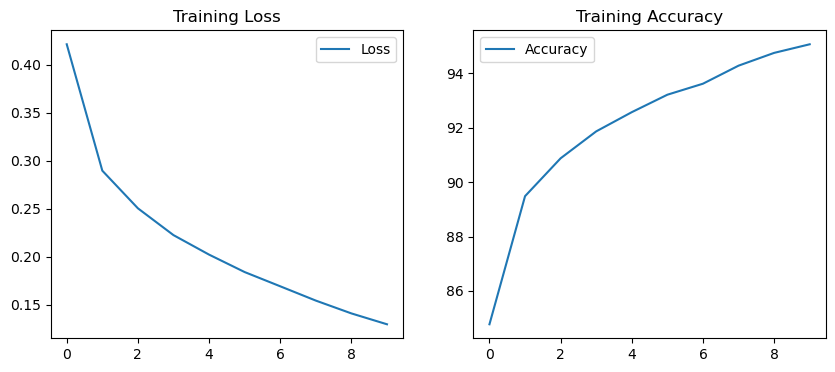

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

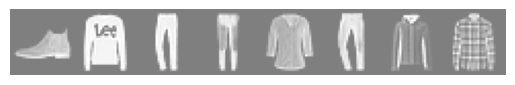

Predicted: Ankle boot Pullover   Trouser    Trouser    Shirt      Trouser    Coat       Shirt     
Actual:    Ankle boot Pullover   Trouser    Trouser    Shirt      Trouser    Coat       Shirt     

Running final model evaluation...

Final Test Accuracy: 92.13%

Detailed Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.81      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.91      0.86      0.88      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.89      0.90      0.89      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.73      0.82      0.77      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
w

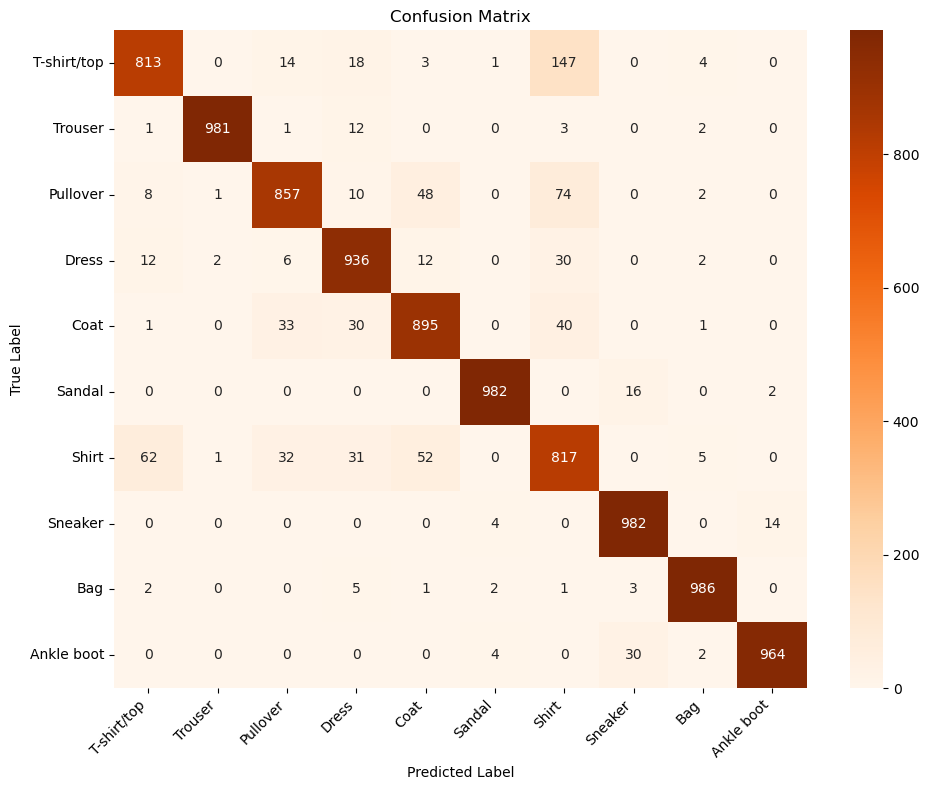

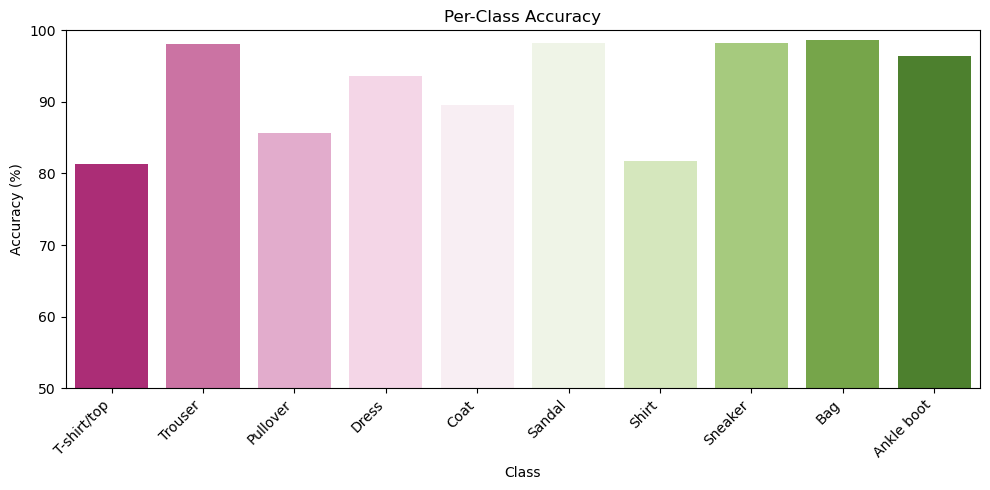

In [20]:
# Function to show images
def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Display sample predictions
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, preds = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images[:8].cpu()))
print('Predicted:', ' '.join(f'{classes[preds[j].cpu()]:10s}' for j in range(8)))
print('Actual:   ', ' '.join(f'{classes[labels[j].cpu()]:10s}' for j in range(8)))

print("\nRunning final model evaluation...")

model.eval()  

# Initialize counters and lists
test_total = 0
test_correct = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Update counters
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        # Collect predictions and true labels for metrics
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute accuracy
test_accuracy = 100 * test_correct / test_total
print(f"\nFinal Test Accuracy: {test_accuracy:.2f}%")

# Classification Report
print("\nDetailed Classification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion Matrix Visualization
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class Accuracy Bar Plot
per_class_acc = cm.diagonal() / cm.sum(axis=1)
acc_df = pd.DataFrame({'Class': classes, 'Accuracy': per_class_acc * 100})

plt.figure(figsize=(10, 5))
sns.barplot(data=acc_df, x='Class', y='Accuracy', palette='PiYG')
plt.title('Per-Class Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(50, 100)
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()


The **CNN** achieved a **Final Test Accuracy of 92.13%**, representing a performance leap over the previous traditional models (Logistic Regression and Random Forest). This success validates the decision to use a CNN, as its ability to learn spatial and hierarchical features proved essential for accurate image classification on the dataset.

Classes with distinct silhouettes (e.g Trouser, Sandal, Bag, Ankle boot) are classified with nearly perfect accuracy and reliability. The per class accuracy is very high on average. The misclassifications significantly reduced in numbers from 200 to 60, but, the model failed to identify actual shirts, confusing them with T-shirt/top or Pullover due to their structural similarities in a low-resolution, grayscale format. 

###### Conclusion: 
Now concluding, through these approaches, future iterations of the project aim to achieve higher accuracy, better generalization, and a more efficient training process. To improve, I will try Data Augmentation by generating modified copies of the training images to increase the effective size and diversity of the training set without collecting new data. This will help the model learn features that are more robust to variations in the item's presentation. After that, I could explore pre-trained CNN architecture designed for massive datasets. 